In [1]:
pwd

'C:\\Users\\Henry\\Code'

In [2]:
from itertools import zip_longest
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import csv

In [3]:
data = open ('Funding Rate History_AXSUSDT Perpetual_2021-10-06.csv',encoding = 'utf-8')

csv_data = csv.reader(data)

Doc= list (csv_data)

# 1) opens the file 
# 2) translates the csv
# 3) translates csv into list of lists

In [4]:
Doc[0:3]

[['\ufeff"Time"', 'Contracts', 'Funding Interval', 'Funding Rate'],
 ['2021-10-06 17:00:00', 'AXSUSDT Perpetual', '8h', '-0.0609%'],
 ['2021-10-06 09:00:00', 'AXSUSDT Perpetual', '8h', '0.0100%']]

In [5]:
for row in Doc[1:]:
    row[3]=row[3][:-1]    # removes the "%"
    row[3]=float(row[3])  # converts string to float

In [6]:
Doc[0:3] #check to see if "%" is removed

[['\ufeff"Time"', 'Contracts', 'Funding Interval', 'Funding Rate'],
 ['2021-10-06 17:00:00', 'AXSUSDT Perpetual', '8h', -0.0609],
 ['2021-10-06 09:00:00', 'AXSUSDT Perpetual', '8h', 0.01]]

In [7]:
time = []
funding_rate = []

for row in Doc[1:]:
    time.append(row[0])

for row in Doc[1:]:
    funding_rate.append(row[3])

In [12]:
df = pd.DataFrame.from_records(Doc) #converts the Doc without '%' opened into a PD
df.drop(index=df.index[0], axis=0, inplace=True) # drop first row which was a header
df = df.set_axis(["Time", "Contracts","Funding_Interval","Funding_Rate"], axis=1) # new headers
df= df.iloc[::-1] # reverses order so oldest is first, newest last
df = df.drop(df.columns[[1,2]], axis=1)  # df.columns drops irelevant collumns e.g "contracts" and "funding_interval"
df.head()

,Time,Funding_Rate
962,2020-11-20 08:00:00,0.0213
961,2020-11-20 16:00:00,0.0602
960,2020-11-21 00:00:00,0.01
959,2020-11-21 08:00:00,0.0152
958,2020-11-21 16:00:00,0.1035


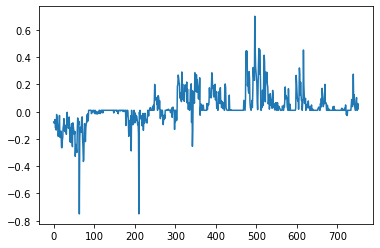

In [13]:
multiplier = 3
lookback = multiplier *70       #(this is in days) funding is per 8 hours
plt.plot(funding_rate[lookback:])

In [14]:
df2 = pd.read_csv('AXSUSDT-1h-data.csv',encoding = 'utf-8') 
df2 = df2.drop(df2.columns[[1,2,3,5,6,7,8,9,10,11]], axis=1)  # dRemoves irellevant collumns e.g OHLC
df2 = df2.set_axis(["Time", "Close_Price"], axis=1) # Renames collums
df2

,Time,Close_Price
0,2020-11-04 13:00:00,0.16963
1,2020-11-04 14:00:00,0.17011
2,2020-11-04 15:00:00,0.15487
3,2020-11-04 16:00:00,0.14710
4,2020-11-04 17:00:00,0.15800
...,...,...
8050,2021-10-06 17:00:00,138.95000
8051,2021-10-06 18:00:00,139.54000
8052,2021-10-06 19:00:00,134.44000
8053,2021-10-06 20:00:00,129.91000


In [45]:
inner_merged = pd.merge(df2, df,on=["Time", "Time"]) # inner merge, removes all other values from first df which do not have a corresponding time value for the 2nd df
inner_merged.Close_Price=pd.to_numeric(inner_merged.Close_Price) # converts close_price to numeric value for plotting
inner_merged.Funding_Rate=pd.to_numeric(inner_merged.Funding_Rate) # converts close_price to numeric value for plotting
inner_merged = inner_merged.reset_index(drop=True) # resets index to zero for plotting 
inner_merged

,Time,Close_Price,Funding_Rate
0,2020-11-20 08:00:00,0.53452,0.0213
1,2020-11-20 16:00:00,0.47404,0.0602
2,2020-11-21 00:00:00,0.52741,0.0100
3,2020-11-21 08:00:00,0.51809,0.0152
4,2020-11-21 16:00:00,0.48001,0.1035
...,...,...,...
956,2021-10-05 09:00:00,139.57000,-0.1174
957,2021-10-05 17:00:00,129.43000,-0.0170
958,2021-10-06 01:00:00,125.55000,-0.0498
959,2021-10-06 09:00:00,123.78000,0.0100


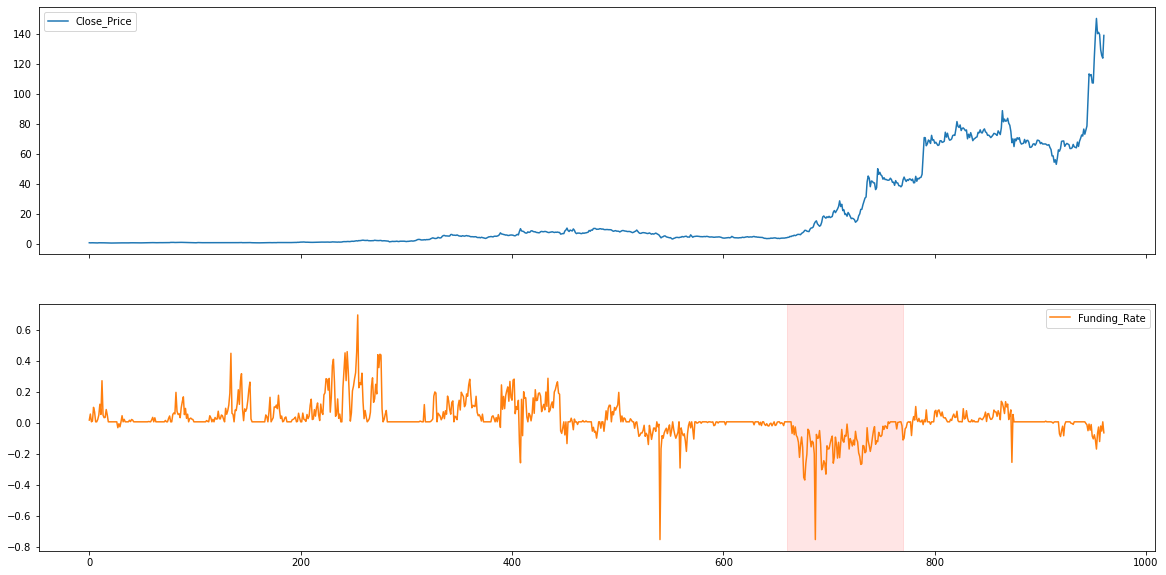

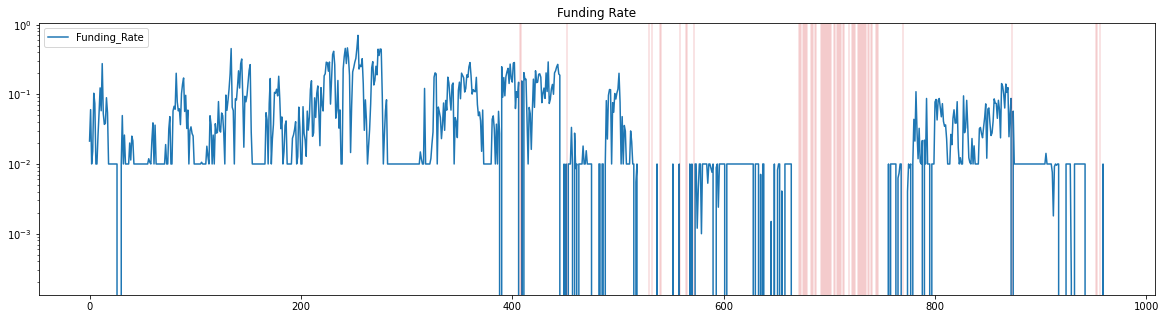

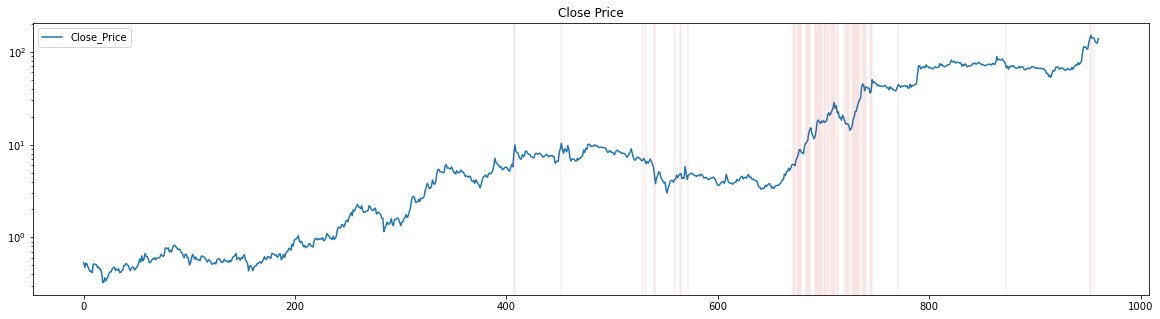

In [88]:
inner_merged.plot.line(figsize=(20,10),subplots=True)
plt.axvspan(660, 770, color='red', alpha=0.1)

dfFiltered = inner_merged[inner_merged['Funding_Rate'] < -0.1]
truedates = dfFiltered.index.tolist()
f1 = plt.figure(figsize=(20,5))
ax1 = f1.add_subplot(1, 1, 1)
inner_merged[['Funding_Rate',]].plot(title='Funding Rate', ax=ax1, logy=True)
for x in truedates:
    ax1.axvline(x, color='tab:red', alpha = 1, linewidth = .25,   linestyle='-')
    

dfFiltered2 = inner_merged[inner_merged['Funding_Rate'] < -0.1]
truedates2 = dfFiltered2.index.tolist()
f2 = plt.figure(figsize=(20,5))
ax2 = f2.add_subplot(1, 1, 1)
inner_merged[['Close_Price',]].plot(title='Close Price', ax=ax2, logy=True)
for x in truedates2:
    ax2.axvline(x, color='tab:red', alpha = 0.5, linewidth = .25,   linestyle='-')

In [31]:
funding_rate_df = inner_merged.drop(inner_merged.columns[[1]], axis=1)  # df.columns drops irelevant collumns e.g "contracts" and "funding_interval"
funding_rate_df.describe()

,Time,Funding_Rate
count,961,961.00
unique,961,589.00
top,2021-07-26 01:00:00,0.01
freq,1,329.00


0.3643399999999997
0.28868
0.26887999999999984
0.24071999999999988
0.2108
0.19686
0.0357
0.01
-0.1305
-0.14456
-0.1657
-0.21522
-0.25917999999999997


array([[<AxesSubplot:title={'center':'Funding_Rate'}>]], dtype=object)

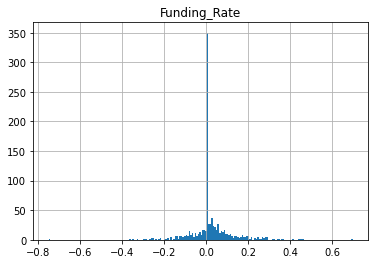

In [34]:
funding_rate_df.Funding_Rate=pd.to_numeric(funding_rate_df.Funding_Rate)
print(funding_rate_df['Funding_Rate'].quantile(q=0.99))
print(funding_rate_df['Funding_Rate'].quantile(q=0.98))
print(funding_rate_df['Funding_Rate'].quantile(q=0.97))
print(funding_rate_df['Funding_Rate'].quantile(q=0.96))
print(funding_rate_df['Funding_Rate'].quantile(q=0.95))
print(funding_rate_df['Funding_Rate'].quantile(q=0.94))
print(funding_rate_df['Funding_Rate'].quantile(q=0.70))
print(funding_rate_df['Funding_Rate'].quantile(q=0.30))
print(funding_rate_df['Funding_Rate'].quantile(q=0.05))
print(funding_rate_df['Funding_Rate'].quantile(q=0.04))
print(funding_rate_df['Funding_Rate'].quantile(q=0.03))
print(funding_rate_df['Funding_Rate'].quantile(q=0.02))
print(funding_rate_df['Funding_Rate'].quantile(q=0.01))
funding_rate_df.hist(bins=200)

In [35]:
funding_rate_df.describe()

,Funding_Rate
count,961.000000
mean,0.025150
std,0.108619
min,-0.750000
25%,0.009600
50%,0.010000
75%,0.053900
max,0.699900


In [23]:
funding_rate_df

,Time,Funding_Rate
0,2020-11-20 08:00:00,0.0213
1,2020-11-20 16:00:00,0.0602
2,2020-11-21 00:00:00,0.0100
3,2020-11-21 08:00:00,0.0152
4,2020-11-21 16:00:00,0.1035
...,...,...
956,2021-10-05 09:00:00,-0.1174
957,2021-10-05 17:00:00,-0.0170
958,2021-10-06 01:00:00,-0.0498
959,2021-10-06 09:00:00,0.0100


In [ ]:
# 2 Components of funding rate 1) Interest Rate 2) Premium. The premium is the reason why price of PERP will converge with price of underlying
# If funding rate is POSITVE  Longs pay Shorts
# If funding rate is NEGATIVE Shorts pay Longs
# This mechanism keepsthe perpetual's price in line with spot prices

In [ ]:
# Avenues to explore
# 3 day trailing funding
# Alt coin funding e.g eth, midcaps
# aggregated funding accross venues?
# Confluence with beta relationship!
# futures backwardation?
# average slippage for $10m orders
# high number of trades per minute plot on chart!